# ECON 326: Introduction to Basic Statistics using Jupyter

Sample
* **Authors**: COMET Team (Emrul Hasan, Jonah Heyl, Shiming Wu, Anneke Dresselhuis)
* Last updated: 15 August 2022
---

## Outline

### Prerequisites
* Introduction to Jupyter 
* Introduction to R

### Outcomes
After completing this worksheet, you will be able to

* Import and load data into R
* Create and customize plots in R
* Compute and visualize descriptive statistics from data
* Perform a t-test in R

## Part 1: Introduction to R and Jupyter


In this tutorial, we will be working with some real-world data: the 2019 Survey of Financial Security, provided by Statistics Canada[<sup id="fn1s">1</sup>](#fn1). First, we will import data into our notebook. We are going to give a brief review of some of the features of R (feel free to skip this if you are already familiar with R or review the introduction notebooks if you are in need of a more comprehensive review).
In R, we import data using different commands, which are stored in **libraries** that other developers of R have created for us.  Let's import some of the most important libraries now.  

We can do this in a Jupyter notebook by selecting a cell and hitting `shift+enter` or by pressing the `play` button in the menu.

> **Important**: information is stored in cells in a notebook.  However, cells run independently; so, if you run a later cell it doesn't re-evaluate previous cells.  You have to re-run them before you can use the results.  You can re-run all the cells in a notebook with the "fast forward" button.



Try loading some of the packages into memory by running the following cell.

In [1]:
# Run this cell to evaluate the code
 
library(tidyverse)
library(haven)
library(dplyr)
library('scales')

source("functions1.r")

#warning messages are okay

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘haven’ was built under R version 4.1.3”
Warning message:
“package ‘scales’ was built under R version 4.1.3”

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Warning message:
“package ‘testthat’ wa

You have now imported the packages into memory, and they are available to use in subsequent cells.  You may also see some output, which tells you about how they have been imported.

As an aside, in this course we try (as much as possible) to use R packages which are part of the [tidyverse](https://www.tidyverse.org/) family of packages.  This is because they are well-supported, consistent, and commonly used in data sciences.  There are (usually) other packages that provide similar functions.



### Importing Data into R

The first step in an econometric project is to import, tidy, and examine your data.  For this project, we will be using data from the 2019 Survey of Financial Security (SFS), provided by Statistics Canada (see the license notes).  This is _real data_ on real Canadians.

In this course, we will always work with data that is **tidy**.  This is a data-science term that refers to data with a particular format or shape.  Specifically, tidy data is rectangular data in which:
* Each row represents one observation
* Each column represents a single variable

You can imagine this as a spreadsheet in a program like Excel.  This is the way most statistical programs like to receive data - but it _isn't_ a property of the data itself.  It is only a representation; there can be other kinds of representations.  For example, a panel data set might have each row as a unit (e.g. country) and each column might represent a variable in a year (e.g. unemployment in 2016, unemployment in 2017, etc.).  Often, when we work with real-world data we have to reshape it in order for it to be usable - but in this course, we won't worry about that just yet.

Data can be stored in many different file formats (which encode how information is stored), which must be interpreted by our statistical programs. For example, data files with a `.dta` are formatted for Stata,  data files with a `.csv` suffix are formatted as comma-seperated values, and data files with an `.Rda` suffix are formatted for R. This is referred to as **importing** data. There are different methods for importing data in different formats; for example:

* `read_dta()`: Importing data from a ```.dta``` file: this is data that was created by the statistical software STATA and is commonly used in economics.
* `read.csv()`: Importing data from a delimited text file: this is data which is in a text format, but where the columns are *delimited* or seperated by a special character.  For example, the ```.csv``` (comma-separated variable) format is text, but where the columns are separated by a comma.
* `load()`: Importing data from an ```.Rda``` file: this is data that was created by the statistical software R and is commonly used in statistics.

Each of these formats has a special **function** associated with it. Functions are commands, stored in R packages, that tell R to do things.  In fact, you've already seen one!  The ```library(...)``` function imports whatever package is in the brackets into memory.

Let's start by importing our ```.dta``` file into memory, using the ```read_dta``` function.  When we read things into memory, we normally want to use them later, so we have to give them a name.  Let's call this ```SFS_data``` so we can refer to it later on.

In [2]:
# read the file named "SFS_2019_Eng.dta" into memory, and assign it to the object SFS_data
SFS_data <- read_dta("../datasets/SFS_2019_Eng.dta")

### Viewing and Inspecting Data

We have now imported our data into R. To better understand our data, the natural next step is to inspect and view it. We always do this immediately after loading in our data to make sure there are no unexpected features or problems with it. We will learn three of these commands:

* ```head(...)```
* ```print(...)```
* ```glimpse(...)```

Let's try these methods out to see what each one does!

In [3]:
head(SFS_data)

pefamid,pweight,pagemieg,PAS1MRAG,PAS1MRG1,PAS1MRG2,PASR1MFA,PASR1MR,pasrbuyg,pasrcnmg,⋯,pwdsloan,pwdstcrd,pwdstloc,pwdstodb,pwdstomr,pwdstvhn,pwdtotal,pwnetwpg,pwnetwpt,verdate
<chr>,<dbl>,<chr>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
00001,4415.0772,06,NA,NA,NA,NA,2,7,NA,⋯,0,0,24000,0,0,47000,351000,511750,502750,28/06/2021
00002,805.4285,14,NA,NA,NA,NA,NA,NA,NA,⋯,0,0,0,0,0,0,0,18250,18250,28/06/2021
00003,1393.1613,12,NA,NA,NA,NA,NA,4,NA,⋯,0,0,0,0,0,0,0,8806000,8806000,28/06/2021
00004,216.7353,11,NA,NA,NA,NA,NA,5,1,⋯,0,0,0,0,87500,0,87500,2019000,2019000,28/06/2021
00005,454.9928,11,NA,NA,NA,NA,NA,5,2,⋯,0,0,140000,0,0,0,140000,4080100,4080100,28/06/2021
00006,2935.6096,04,NA,NA,NA,NA,2,9,NA,⋯,22000,600,28000,0,0,0,330600,160550,155050,28/06/2021


In [4]:
print(SFS_data)

# A tibble: 10,422 × 100
   pefamid pweight pagemieg  PAS1MRAG  PAS1MRG1 PAS1M…¹ PASR1…² PASR1MR pasrbuyg
   <chr>     <dbl> <chr>    <dbl+lbl> <dbl+lbl> <dbl+l> <dbl+l> <dbl+l> <dbl+lb>
 1 00001     4415. 06              NA        NA      NA      NA  2 [No]  7 [200…
 2 00002      805. 14              NA        NA      NA      NA NA      NA      
 3 00003     1393. 12              NA        NA      NA      NA NA       4 [198…
 4 00004      217. 11              NA        NA      NA      NA NA       5 [199…
 5 00005      455. 11              NA        NA      NA      NA NA       5 [199…
 6 00006     2936. 04              NA        NA      NA      NA  2 [No]  9 [201…
 7 00007      920. 13              NA        NA      NA      NA NA       6 [200…
 8 00008     1057. 14              NA        NA      NA      NA NA       5 [199…
 9 00009      940. 07              NA        NA      NA      NA NA       7 [200…
10 00010      214. 11              NA        NA      NA      NA NA       4 [198…
# …

In [6]:
You can use the following command to know the detailed information of variables.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: You can
        ^


In [7]:
# If you want to know more about the variables, you can input the name in dictionary(). Sometimes you may need to compile 'source("functions2.r")' twice.
dictionary('pefatinc')

[1] "after-tax-income"

Your turn! Try using the `glimpse()` function to check out the data. Store your answer in a variable called `answer0`

In [8]:
source("functions1.r")

answer00 <- glimpse(SFS_data)
test_00()

Rows: 10,422
Columns: 100
$ pefamid  <chr> "00001", "00002", "00003", "00004", "00005", "00006", "00007"…
$ pweight  <dbl> 4415.0772, 805.4285, 1393.1613, 216.7353, 454.9928, 2935.6096…
$ pagemieg <chr> "06", "14", "12", "11", "11", "04", "13", "14", "07", "11", "…
$ PAS1MRAG <dbl+lbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ PAS1MRG1 <dbl+lbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ PAS1MRG2 <dbl+lbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ PASR1MFA <dbl+lbl>  NA,  NA,  NA,  NA,  NA,  NA,  NA,  NA,  NA,  NA,  NA, 55…
$ PASR1MR  <dbl+lbl>  2, NA, NA, NA, NA,  2, NA, NA, NA, NA, NA,  2,  2, NA, N…
$ pasrbuyg <dbl+lbl>  7, NA,  4,  5,  5,  9,  6,  5,  7,  4, NA,  7,  6,  6,  …
$ pasrcnmg <dbl+lbl> NA, NA, NA,  1,  2, NA, NA, NA, NA,  1,  1, NA, NA, NA, N…
$ pasrcon  <dbl+lbl> 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, …
$ pasrcst  <dbl+lbl> 300000,     NA, 260000, 210000, 430000, 320000, 220000,  …
$ pasrcurg <db

If you want to familiarize yourself with the data, you can run the next loop which prints out a definition for each variable. (don't forget to un-comment the code!)

In [9]:
 for (word in names( SFS_data)) {
   print(word)
   print(dictionary(word))
 } # translates the data to readable words

[1] "pefamid"
[1] NA
[1] "pweight"
[1] NA
[1] "pagemieg"
[1] "Age of the major income earner in the family unit."
[1] "PAS1MRAG"
[1] NA
[1] "PAS1MRG1"
[1] NA
[1] "PAS1MRG2"
[1] NA
[1] "PASR1MFA"
[1] NA
[1] "PASR1MR"
[1] NA
[1] "pasrbuyg"
[1] NA
[1] "pasrcnmg"
[1] NA
[1] "pasrcon"
[1] NA
[1] "pasrcst"
[1] "price of property"
[1] "pasrcurg"
[1] NA
[1] "PASRDPO1"
[1] NA
[1] "PASRDPO2"
[1] NA
[1] "PASRDPO3"
[1] NA
[1] "PASRDPO4"
[1] NA
[1] "PASRDPO5"
[1] NA
[1] "pasrdwng"
[1] NA
[1] "pasrfnmg"
[1] NA
[1] "pasrint"
[1] NA
[1] "pasrintg"
[1] "interest rate"
[1] "pasrmoag"
[1] NA
[1] "pasrmpfg"
[1] NA
[1] "pasrmryg"
[1] NA
[1] "pasrrntg"
[1] NA
[1] "pasrskp"
[1] NA
[1] "pattcrc"
[1] NA
[1] "pattcrlm"
[1] "What is the total credit limit on all credit card(s) that you (and your family) own?"
[1] "pattcrr"
[1] NA
[1] "pattcru"
[1] NA
[1] "pattdif"
[1] NA
[1] "pattlcp"
[1] NA
[1] "pattlcr"
[1] NA
[1] "pattpayd"
[1] NA
[1] "pattrsa"
[1] NA
[1] "pattrsh"
[1] NA
[1] "pattrsl"
[1] NA
[1] "pattrsp"
[1

Some important variables in this dataset:

* ```pefmtinc```: income_before_tax
* ```pefatinc```: income_after_tax
* ```pwnetwpg```: wealth
* ```pgdrmie```: gender
* ```peducmie```: education


#### Accessing Variables and Data Frames

If you recall, this dataset is _tidy_ in that each observation is a row, and each column is a variable.  In R, datasets are called *data frames* - this particular one is a special type of data frame called a _tibble_ (like, table).  We don't need to get into too many details about data frames, but basically they collect and organize all of the variables and observations.  Many functions in R need information to be organized into a data frame so that it can be computed.  You will see examples of these later on.

One of the most important things to remember is that you can access the _variables_ in a dataframe in two ways:

1.  First, you can use the `$` operator to directly access the variables
2.  Second, within a command, you can tell the command what data you are working with, then refer to the variables by name.

For example, if we wanted to get the `mean` of `pwnetwpg` (wealth) we could do it this way:

In [10]:
mean(SFS_data$pwnetwpg)

[1] 1029539

This says: get the variable ``pwnetwpg`` from the dataframe ``SFS_data``, then compute the mean.  In a command like ``filter`` you can tell the command to work with the data, and then refer to the variables just by their name.  

Try it our yourself! What is the maximum value for education in this data set? (hint, try  the `max()` function) 

In [11]:

answer0 <- max(SFS_data$peducmie)

print(answer0)
test_0() 

[1] "9"
Test passed 😀
[1] "Success!"


In [12]:
SFS_data <- filter(SFS_data, !is.na(SFS_data$pefmtinc))  # here we filter out the observations where before tax income is missing (or is a NA)

In [13]:
SFS_data <- rename(SFS_data, income_before_tax = pefmtinc) # finally, we can rename columns, to be more meaningfull names, this is not nessary but is generally a good practice
SFS_data <- rename(SFS_data, income_after_tax = pefatinc)
SFS_data <- rename(SFS_data, wealth = pwnetwpg)
SFS_data <- rename(SFS_data, gender = pgdrmie)
SFS_data <- rename(SFS_data, education = peducmie)

## Part 2: The Wealth Gap in Female and Male Lead Households

Now we can get started on our analysis. You may have heard people talk about the gender income/wealth gap in the news, politics or even other economics courses. For complex reasons that we won't get into here, women in many societies have historically and continue to experience economic inequality on the basis of their gender. In fact, many studies show that there is gender income gap and gender wealth gap, despite the fact that women are an important part of workforce. 

In this analysis, we'll be exploring a few of the following questions:
What factors contribute to the gender gap? Here we are going to explore the wealth gap between male lead households and female lead households 
> In this context, a **male lead household** is a household in which a male earns the majority of the income and a **female lead household** is a household in which a female earns the majority of the income.

<span style="color:#CC7A00" > 🔎 **Let's think critically** </span>
> 🟠 Note that in this dataset, sex and gender are used synonymously to describe two binary classes. In real life, a person's gender may not correspond to the sex assigned to them at birth, or even to a classification of sexual identity that exists in the view of Western hegemonic gender and sexuality tradition; as such, notions of sexuality and gender are best understood to exist on a spectrum rather than as a binary class.\
> 🟠 In the context of gender classification, what do you think are some ways that coding variables can reinforce exclusionary logics or dis/misrepresent certain people groups?\
> 🟠 What _other_ kinds of economic gender income or wealth gap questions are overlooked when we only look at differences between people who identify as [cisgendered](https://en.wikipedia.org/wiki/Cisgender) men and women?\
> 🟠 If you are interested in learning more about Statistics Canada's work in diversifying gender and sexual expression in the national census for 2021, you can read their [technical report on sex at birth and gender](https://www12.statcan.gc.ca/census-recensement/2021/ref/98-20-0002/982000022020002-eng.cfm) issued in July 2020.  

With this in mind, we'll begin our analysis by asking ourselves: is there a significant gap between male lead household wealth and female lead household wealth? A different way to ask this is: given our data, what percent of the time would we except this gap to appear randomly? This describes a p-value, so first we will perform a t-test, to get this value. Now if this p-value indicates a significant gap in wealth, we can go on to ask what is causing this wealth gap.

At a high level, there are a few things that can cause this wealth gap:

1. **Difference in income** between male and female lead households.  
2. **Difference in saving and investment habits** between male and female lead households (ie, male lead households might take on more risk or holds less cash than female lead households). 
3. **Difference in inherited wealth** between male and female lead households (ie, female lead households might inherit less wealth (regardless of income).
4. **Difference in economic obstacles** faced by male and female lead households (ie, female lead households might face additional obstacles in building wealth or accessing credit).

> **Note**: these factors are not mutual exclusive - that is, lower income and less inheritance can have simultaneous affects on a person's wealth.

We'll be exploring this topic for the next three modules. In this module, we'll see if there is a significant wealth gap, and what causes it, which may involve investigating the income gap between male and female lead households. First off, we're going to compute the average family wealth. Then we compute the average family wealth conditional on being a female lead household vs a male lead households. Next we will do a t-test to see if the wealth gap is significant. Finally, we will briefly investigate what is causing the wealth gap.

In [14]:
mean(SFS_data$wealth) #thiscompute the sample mean of wealth from the SFS_data set
#notice no more jargon! we just removed it. 

[1] 1030591


We need to tell R that our variables are actually qualitative (factor) variables, so they are easier to read.  Let's try that now using the ``as_factor`` function. This function automatically translates labelled values into factor variables.  Compare the results above with the new dataset below.

In [15]:
SFS_data<-SFS_data[!(SFS_data$education=="9"),]
SFS_data$education <- as.numeric(SFS_data$education) #changes the education variable to a numerical varaible, we don't really need to think too deeply about this
SFS_data <- SFS_data[order(SFS_data$education),]
SFS_data$education <- as.character(SFS_data$education)  #changes the education variable to text, we don't really need to think too deeply about this
SFS_data$education[SFS_data$education == "1"] <- "Less than high school" 
SFS_data$education[SFS_data$education == "2"] <- "High school"
SFS_data$education[SFS_data$education == "3"] <- "Non-university post-secondary"
SFS_data$education[SFS_data$education == "4"] <- "University"

In [16]:
SFS_data$gender <- as_factor(SFS_data$gender) # this swaps gender to be male or female rather than 0 or 1
SFS_data$education <- as_factor(SFS_data$education) #education are now factors

### Computing the Wealth Gap

We will first describe the gender wealth gap. In R, there are many ways we could compute basic descriptive statistics.  The simplest way is to use ``summarize`` and ``group_by``:

In [17]:
# Next we look at wealth for households with men and women as main earners
results <- 
    SFS_data %>%  #more information about the %>% can be found in the introduction to R in comet
    group_by(gender) %>%
    summarize(m_wealth = mean(wealth), sd_wealth = sd(wealth)) 

results #more information about the tibble can be found in the introduction to R in comet

gender,m_wealth,sd_wealth
<fct>,<dbl>,<dbl>
Male,1128033.5,1875387
Female,892747.9,1524154


> **Advanced Note**: _piping_ The above example uses a special R command called a **pipe operator** (``%>%``).  Mechanically, what piping does is insert the object before the pipe into the object after the pipe.  For example, if we have ``z <- f(x,y)`` we could write this using pipes as ``z <- x %>% f(y)``.  Piping is really most useful when you are chaining (piping) a series of commands together.  You can think of a pipe as saying "_and then_" followed by a command.  The item before the pipe will be inputted into the next command.  This allows you to do complex data manipulation in a way that is readable.
>
> For example, the command above (1) starts with ``SFS_data`` (2) groups it by ``gender``, (3) takes the grouped data and summarizes it.  If we wrote this without using a pipe it would look like:
> ``summarize(group_by(SFS_data,gender), m_wealth = mean(wealth), sd_wealth = sd(wealth))``


We can also visualize this, using ``ggplot2``, which can create bar graphs and other visualizations.  Here's a bar graph and a boxplot.

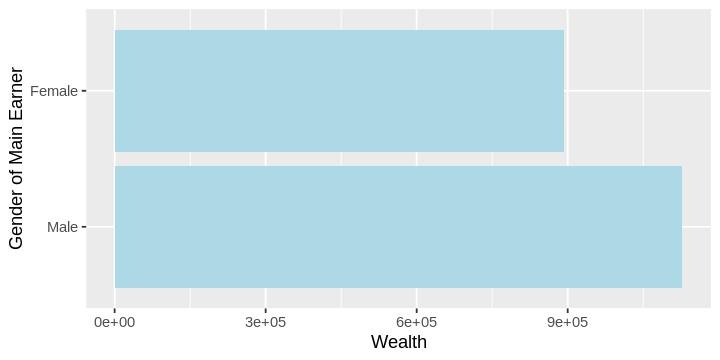

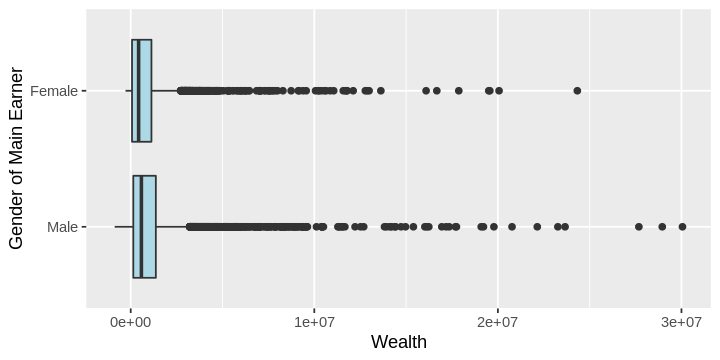

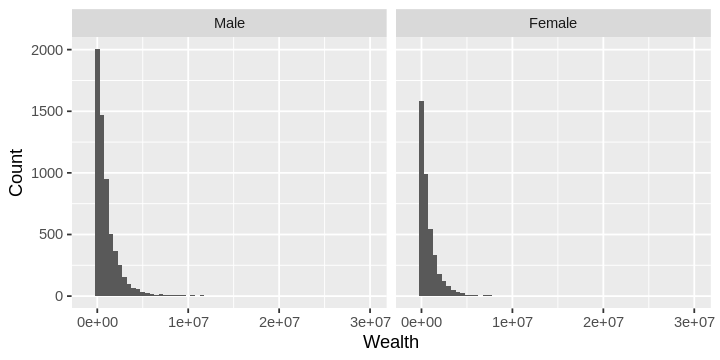

In [18]:
f <- ggplot(data = SFS_data, aes(x = gender, y = wealth)) + xlab("Gender of Main Earner") + ylab("Wealth")  #labels and defines our x and y axis
f1 <- f + geom_bar(stat = "summary", fun = "mean", fill = "lightblue") # produce a summary statistic, the mean
f1 <- f1 + coord_flip() # make a horizontal bar graph!

options(repr.plot.width=6,repr.plot.height=3) # this controls the size; you can change 6 and 3 to look better

f2 <- f + geom_boxplot(fill = "lightblue") + coord_flip() #formatting preferences

f3 <- ggplot(data = SFS_data, aes(x = wealth)) + geom_histogram(binwidth = 500000) + xlab("Wealth") + ylab("Count") + facet_grid(. ~ gender) 

f1
f2
f3

> _Think Deeper:_ What does this tell you about the distribution of wealth in these datasets?  Could this be a problem for our analysis?

This is all interesting to look at.  However, this is not a formal test of the gender-wealth gap.  We need to examine this from a statistical perspective. In other words, we would like to examine if the gender-wealth gap is statistically significant. We can do this through a two sample $t$-test, which can be performed using the `t.test()` command in R: 

In [19]:
t1 = t.test(  #take not of this useful function
       x = filter(SFS_data, gender == "Male")$wealth,
       y = filter(SFS_data, gender == "Female")$wealth,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

t1 

round(t1$estimate[1] - t1$estimate[2],2) # this just rounds our results


	Welch Two Sample t-test

data:  filter(SFS_data, gender == "Male")$wealth and filter(SFS_data, gender == "Female")$wealth
t = 6.9324, df = 9710.4, p-value = 4.401e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 168756.2 301815.0
sample estimates:
mean of x mean of y 
1128033.5  892747.9 


mean of x 
 235285.6

As we can see here, the `t.test()` command outputs the $p$-value and test statistic immediately. This particular $t$-test was for a 95% confidence level. The gender-wealth gap is $235,285.60 dollars. As you can see, there is a significant gap in wealth between male and female lead households.

### Going Deeper:
> ***What could be the potential causes of the gender-wealth gap in Canada?***

The next step is to understand why or how the gender wealth gap might exist. The natural potential factors to study are education and income. For example, perhaps females are less likely to have a university degree in a high-paying field, or perhaps females earn less income.  These reasons could potentially create a gender wealth gap.  Let's take a look at education in the survey, then try to understand how it interacts with gender:

In [20]:
# Next we look at wealth for households with different education
results <- 
    SFS_data %>% #we define our dataset 
    group_by(education) %>%  #group variable of interest
    summarize(m_wealth = mean(wealth), sd_wealth = sd(wealth))

results

education,m_wealth,sd_wealth
<fct>,<dbl>,<dbl>
Less than high school,535499.2,1319340
High school,788263.7,1449500
Non-university post-secondary,842493.1,1519448
University,1481145.5,2061947


The results suggest average wealth increases with education of the main earner. 

> _Think Deeper:_ Why might this be the case?  

We also see how this breaks down by gender.  Look at the following table - do you see a pattern?

`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


education,gender,m_wealth,sd_wealth
<fct>,<fct>,<dbl>,<dbl>
Less than high school,Male,587457.9,1174738
Less than high school,Female,448290.9,1529116
High school,Male,840156.9,1513918
High school,Female,702158.5,1332181
Non-university post-secondary,Male,901916.2,1521343
Non-university post-secondary,Female,747951.4,1512318
University,Male,1680511.1,2346053
University,Female,1213003.7,1563383


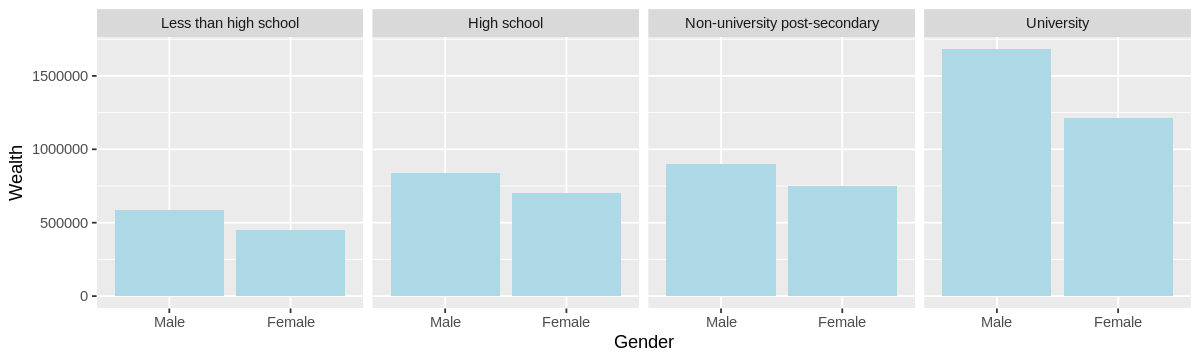

In [21]:
results <- 
    SFS_data %>% #we define our dataset 
    group_by(education,gender) %>% #group variable of interest
    summarize(m_wealth = mean(wealth), sd_wealth = sd(wealth))

results

options(repr.plot.width=10,repr.plot.height=3)

f <- ggplot(data = SFS_data, aes(x = gender, y = wealth)) + xlab("Gender") + ylab("Wealth") #labels and defines our x and y axis
f <- f + geom_bar(stat = "summary", fun = "mean", fill = "lightblue") #produce a summary statistic, the mean
f <- f + facet_grid(. ~ education) #add a grid by education

f

You can see that female-lead households tend to accumulate less wealth than the male counterpart.  

However, it is worthwhile to look at the difference in wealth gap in percent terms rather than absolute terms. This is because people at a higher education level earn more so the gap may appear deceptively larger. ``percentage_table`` is a function, which takes `result`, name of `column1` and name of `column3` of `results` table that we summarized as inputs. We assign this function to the object `percentage_table`, and produce the table we want. 

In [22]:
percentage_table <- function(result,column1,column3) {
female_wealth=filter(result,gender=='Female')[[column3]] #isolate female values
male_wealth=filter(result,gender=='Male')[[column3]] #isolate male values
wealth_gap= (male_wealth-female_wealth)/female_wealth #we get the percent difference
education=filter(result,gender=='Female')[[column1]] #isolate education values
gap= data.frame(education,wealth_gap) #places data into a table
wealth_gap<-percent(gap$wealth_gap) #show in percentage form
gap$wealth_gap<-as.character(gap$wealth_gap) #changes varaible to printable characters
gap$wealth_gap<-wealth_gap
return(gap)
}

Let's call `percentage_table` and use `results` generated in previous cell (the $8\times 4$ table) as the inputs. The following table is the average percentage of wealth which shows that a male-lead household accumulates more than a female-lead household.

In [59]:
percentage_table(result=results, column1="education", column3="m_wealth") #define the data set and columns

education,wealth_gap
<fct>,<chr>
Less than high school,31.04%
High school,19.65%
Non-university post-secondary,20.58%
University,38.54%


From the results above, a family with a male as the main earner generally accumulates more wealth than female-lead household which has similar education background. The gender-wealth gap is widest for university graduates, with male-lead family has 38.54% more wealth than female-lead family. We can make this even more clear by adding a new variable (``university``) to our dataset.  Frequently, we will want to make new variables to help us analyze the results, especially when a variable is more complicated than we would like it to be.

You can create this in many ways - but a very useful command is the ``case_when`` command.  Here is an example for our ``university`` variable.  Pay attention to the use of the ``as_factor`` command at the end to tell R that this is still a qualitative variable.



In [61]:
SFS_data <- SFS_data %>% 
               mutate( # more information on mutate in introduction to r modules
               university = case_when( 
                     education == "University" ~ "Yes", #the ~ seperates the original from the new name
                     education == "Non-university post-secondary" ~ "No", #changes the non university variable to "No"
                     education == "High school" ~ "No", #changes the non university variable to "no"
                     education == "Less than high school" ~ "No")) %>% #changes the non university variable to "no"
             mutate(university = as_factor(university)) #remember, it's a factor!

glimpse(SFS_data$university)

 Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


Now, let's repeat the analysis we did above by education status; then we can perform a $t$-test on each of these sub-groups:

`summarise()` has grouped output by 'university'. You can override using the
`.groups` argument.


university,gender,m_wealth,sd_wealth
<fct>,<fct>,<dbl>,<dbl>
No,Male,818279.2,1461872
No,Female,674883.3,1457515
Yes,Male,1680511.1,2346053
Yes,Female,1213003.7,1563383


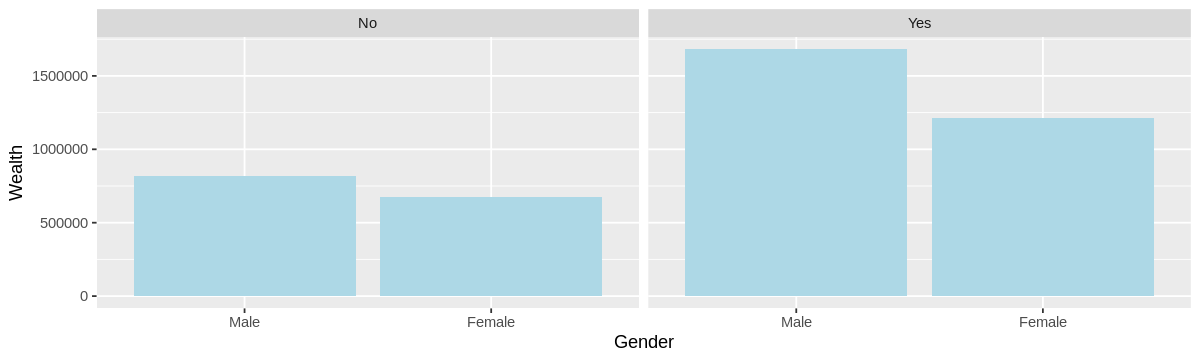

In [62]:
results <- 
    SFS_data %>%
    group_by(university,gender) %>%
    summarize(m_wealth = mean(wealth), sd_wealth = sd(wealth))

results 

f <- ggplot(data = SFS_data, aes(x = gender, y = wealth)) + xlab("Gender") + ylab("Wealth") #label and define our x and y axis
f <- f + geom_bar(stat = "summary", fun = "mean", fill = "lightblue") #produce a summary statistic, the mean
f <- f + facet_grid(. ~ university) #add a grid by education

f

Similarly, let's look at the difference in wealth gap in percent terms. We use `results` generated in previous cell (the $4\times 4$ table) as the inputs this time.

In [63]:
percentage_table(result=results, column1="university", column3="m_wealth")

education,wealth_gap
<fct>,<chr>
No,21%
Yes,39%


Without a university degree, male-lead households accumulate 21% more wealth than female counterparts, while with university degree, the gap is widened to 39%. Thus education seems to enlarge the gender-wealth gap.

Let's study gender wealth gap within subsamples of "university degree" and "no university degree" respectively by running formal two sample t-test in the 2 subsamples.

In [66]:
university_data = filter(SFS_data, university == "Yes") # university only data 
nuniversity_data = filter(SFS_data, university == "No") # non university data

t2 = t.test(
       x = filter(university_data, gender == "Male")$wealth,
       y = filter(university_data, gender == "Female")$wealth,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

t2  # test for the wealth gap in university data

round(t2$estimate[1] - t2$estimate[2],2) #rounds our estimate


t3 = t.test(
       x = filter(nuniversity_data, gender == "Male")$wealth,
       y = filter(nuniversity_data, gender == "Female")$wealth,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

t3 # test for the wealth gap in non-university data

round(t3$estimate[1] - t3$estimate[2],2) #rounds our estimate


	Welch Two Sample t-test

data:  filter(university_data, gender == "Male")$wealth and filter(university_data, gender == "Female")$wealth
t = 7.3872, df = 3782.4, p-value = 1.836e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 343428.9 591586.0
sample estimates:
mean of x mean of y 
  1680511   1213004 


mean of x 
 467507.5


	Welch Two Sample t-test

data:  filter(nuniversity_data, gender == "Male")$wealth and filter(nuniversity_data, gender == "Female")$wealth
t = 3.7902, df = 5082.4, p-value = 0.0001523
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  69225.74 217566.06
sample estimates:
mean of x mean of y 
 818279.2  674883.3 


mean of x 
 143395.9

Consider the results above.  Do you think the results of Welch Two Sample t-test are consistent with the above descriptive results?

> _Think Deeper_: How can you explain the effects of education on gender-wealth gap? What would you need to know in order to rationalize your explanation?  

### Wrapping Up

At this point, we have started to explore the gender wealth gap.  Next, work on the following exercises to learn more. We will touch on the second important factor: income.

## Part 3: Exercises

### Activity 1 
First, examine ``SFS_data`` with a focus on before-tax income. Create a table that tabulates the average before-tax income by gender. A correct ``tab_income`` table will pass the test.  Try looking at how we generated some of the earlier tables for inspiration, if you need a hint.

In [90]:

tab_income <- #fill in the code below; what goes before the %>%?
    SFS_data %>% 
    group_by(gender)  %>%
    summarize(m_income = mean(income_before_tax), sd_income = sd(income_before_tax))

tab_income

answer1 <- tab_income
test_1() #quiz 1


gender,m_income,sd_income
<fct>,<dbl>,<dbl>
Male,109613.58,142974.31
Female,75269.41,89658.98


Test passed 🥳
[1] "Success!"


### Short Answer 1:

What type of variable is ``gender``? Does it make sense to have ``gender`` as that variable type? Why or why not?  Write your answer in the box below:

<font color="red">Type answer here
</font>

### Activity 2

The table that we got in the previous activity is fairly clear, but let's illustrate things with a chart. Construct a bar graph that charts the average income before tax by gender. ``income_graph`` will store this plot. You can see it by running the second code chunk below.

Don't know how to automatically pick scale for object of type haven_labelled/vctrs_vctr/double. Defaulting to continuous.



Test passed 😀
[1] "Success!"


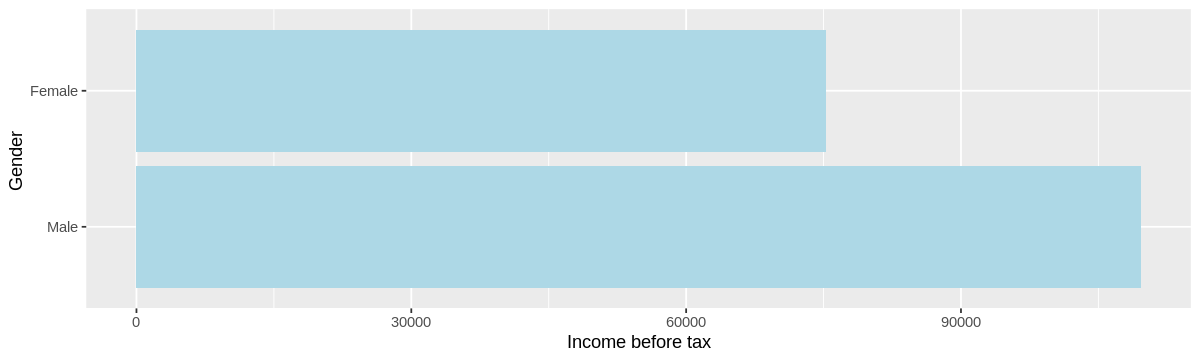

In [92]:
source("functions1.r")

SFS_data$gender <- haven::as_factor(SFS_data$gender)
income_graph <- ggplot(data = SFS_data, aes(x = gender, y = income_before_tax)) + xlab("Gender ") + ylab("Income before tax")  #what goes in the x = spot?  what goes in xlab("")?
income_graph <- income_graph + geom_bar(stat = "summary", fun = mean, fill = "lightblue")
income_graph <- income_graph + coord_flip()


income_graph


answer1_5 <- income_graph
test_1_5() #quiz 1.5

### Short Answer 2
Examine the graph.  What do we observe when we compare the average before-tax income between genders? What does this suggest?

<font color="red">...</font>

### Activity 3
Now, create a table that tabulates average before-tax income by education level and gender. This table, labelled ``tab_income2``, will be tested for correctness.

In [95]:

tab_income2 <- 
    SFS_data %>%
    group_by(education,gender) %>% 
    summarize(m_income = mean(income_before_tax), sd_income = sd(income_before_tax))

tab_income2

answer2 <- tab_income2
test_2() #quiz 2


`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


education,gender,m_income,sd_income
<fct>,<fct>,<dbl>,<dbl>
Less than high school,Male,47140.72,58439.74
Less than high school,Female,23477.31,70538.04
High school,Male,81191.49,78901.52
High school,Female,51472.26,63750.58
Non-university post-secondary,Male,99335.89,79740.78
Non-university post-secondary,Female,65724.20,86372.51
University,Male,157819.15,205913.19
University,Female,108537.15,95725.67


Test passed 🎉
[1] "Success!"


Next, create table of percentage that compares average income gap between males and females within education levels (``tab_income_percent`` will store this). Note that most of the syntax is provided -- you simply need to fill in the missing code.

In [104]:
source("functions1.r")

percentage_table <- function(result,column1,column3) { #this is the same function but not we need income not wealth
female_income=filter(result,gender=='Female')[[column3]] #isolate female values
male_income=filter(result,gender=='Male')[[column3]] #isolate male values
income_gap= (male_income-female_income)/female_income #we get the percent difference
education=filter(result,gender=='Female')[[column1]] #isolate education values
gap= data.frame(education,income_gap) #places data into a table
income_gap<-percent(gap$income_gap) #show in percentage form
gap$income_gap<-as.character(gap$income_gap) #changes varaible to printable characters
gap$income_gap<-income_gap
return(gap)
}

tab_income_percent <- percentage_table(result=tab_income2 , column1="education", column3="m_income")
tab_income_percent

answer2_5 <- tab_income_percent

test_2_5() #quiz 1.5

education,income_gap
<fct>,<chr>
Less than high school,100.8%
High school,57.7%
Non-university post-secondary,51.1%
University,45.4%


Test passed 🌈
[1] "Success!"


### Short Answer 3
Examine the table. What do we observe when we compare the before-tax income gap between education levels? What does this suggest? And if you compare the income gap table with wealth gap table (percentage), what do you find? Would the result be what we expect? What could explain this finding?

<font color="red">......</font>

### Activity 4
Economists are often concerned with two aspects of the relationship between male and female lead households  and education:
* Difference in average income between the two household groups
* The difference in returns to education between the two household groups

Let's explore these two topics. First, test whether there are significant differences in income before tax between male and female lead households within each education group. Within which education levels do we see significant differences 

_Note_: You will perform the t-test's of gender income gap on each education group.

In [117]:
 source("functions1.r")

less_than_high_school_data = filter(SFS_data, education == "Less than high school") #filter variables we need
high_school_data = filter(SFS_data, education == "High school")
post_secondary_data = filter(SFS_data, education == "Non-university post-secondary")
university_data = filter(SFS_data, education == "University")

#Less than high school
tlesshs = t.test( 
       x = filter(less_than_high_school_data, gender == "Male")$income_before_tax,
       y = filter(less_than_high_school_data, gender == "Female")$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

tlesshs

tlesshs_ans=round(tlesshs$estimate[1] - tlesshs$estimate[2],2) #rounds answer

answer3_3 <- tlesshs_ans

test_3_3() 


	Welch Two Sample t-test

data:  filter(less_than_high_school_data, gender == "Male")$income_before_tax and filter(less_than_high_school_data, gender == "Female")$income_before_tax
t = 6.0219, df = 817.85, p-value = 2.602e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 15950.2 31376.6
sample estimates:
mean of x mean of y 
 47140.72  23477.31 


Test passed 🌈
[1] "Success!"


In [125]:
source("functions1.r")

#High school
ths = t.test(
       x = filter(high_school_data, gender == "Male")$income_before_tax,
       y = filter(high_school_data, gender == "Female")$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)
ths

 
ths_ans=round(ths$estimate[1] - ths$estimate[2],2) #rounds answer

answer3 <- ths_ans

test_3()
 


	Welch Two Sample t-test

data:  filter(high_school_data, gender == "Male")$income_before_tax and filter(high_school_data, gender == "Female")$income_before_tax
t = 9.8409, df = 2092, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 23796.77 35641.70
sample estimates:
mean of x mean of y 
 81191.49  51472.26 


Test passed 🎊
[1] "Success!"


In [128]:
source("functions1.r")

# Non-uni post-seconary
tsocol = t.test(
       x = filter(post_secondary_data, gender == "Male")$income_before_tax,
       y = filter(post_secondary_data, gender == "Female")$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)
tsocol
tsocol_ans=round(tsocol$estimate[1] - tsocol$estimate[2],2) #rounds answer

answer3_7 <- tsocol_ans

test_3_7()



	Welch Two Sample t-test

data:  filter(post_secondary_data, gender == "Male")$income_before_tax and filter(post_secondary_data, gender == "Female")$income_before_tax
t = 10.358, df = 2172, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 27248.02 39975.37
sample estimates:
mean of x mean of y 
 99335.89  65724.20 


[1] "c0f56d971341cd25d063c90671c9fcc8"

Test passed 🌈
[1] "Success!"


In [135]:
source("functions1.r")
#University

tuni = t.test(
       x = filter(university_data, gender == "Male")$income_before_tax,
        y = filter(university_data, gender == "Female")$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

tuni
tuni_ans=round(tuni$estimate[1] - tuni$estimate[2],2) #rounds answer


answer4 <- tuni_ans


test_4()


	Welch Two Sample t-test

data:  filter(university_data, gender == "Male")$income_before_tax and filter(university_data, gender == "Female")$income_before_tax
t = 9.8699, df = 3281.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 39491.99 59072.01
sample estimates:
mean of x mean of y 
 157819.1  108537.1 


Test passed 🥳
[1] "Success!"


### Activity 5
Next, examine whether returns to education differ between genders. For our purposes, we will define:
> **Returns to Education**: The difference in average income before tax between two subsequent education levels.

Run this test for the returns to education of: 
* High school diploma (relative to less than high school) and 
* University degree (relative to non-university post-secondary)

*The following t-test objects will be tested for correctness:* Returns to education of a high school diploma for males (``retHS``) and for females(``retHSF``), and returns to education of a university's degree for males (``retU``) and for females (``retUF``).

In [165]:
 source("functions1.r")
#Returns to education: High school diploma

##Males
less_than_high_school_data = filter(SFS_data, education == "Less than high school") #filter variables we need
high_school_data = filter(SFS_data, education == "High school")
post_secondary_data = filter(SFS_data, education == "Non-university post-secondary")
university_data = filter(SFS_data, education == "University")


retHS = t.test(
       x = filter(high_school_data, gender == "Male")$income_before_tax,
       y = filter(less_than_high_school_data, gender == "Male")$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

retHS
retHS_ans=round(retHS$estimate[1] - retHS$estimate[2],2)

test_5() 


	Welch Two Sample t-test

data:  filter(high_school_data, gender == "Male")$income_before_tax and filter(less_than_high_school_data, gender == "Male")$income_before_tax
t = 11.44, df = 1968.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 28213.26 39888.30
sample estimates:
mean of x mean of y 
 81191.49  47140.72 


Test passed 🥇
[1] "Success!"


In [151]:
 source("functions1.r")
#Returns to education: High school diploma
#Females

retHSF = t.test(
       x = filter(high_school_data, gender == "Female")$income_before_tax,
       y = filter(less_than_high_school_data, gender == "Female")$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

retHSF
retHSF_ans=round(retHSF$estimate[1] - retHSF$estimate[2],2)

test_6()


	Welch Two Sample t-test

data:  filter(high_school_data, gender == "Female")$income_before_tax and filter(less_than_high_school_data, gender == "Female")$income_before_tax
t = 7.0649, df = 846.02, p-value = 3.359e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 20217.37 35772.52
sample estimates:
mean of x mean of y 
 51472.26  23477.31 


Test passed 😸
[1] "Success!"


In [160]:
 source("functions1.r")
#Returns to education: University

##Males

retU = t.test(
       x = filter(university_data, gender == "Male")$income_before_tax,
       y = filter(post_secondary_data, gender == "Male")$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

retU
retU_ans=round(retU$estimate[1] - retU$estimate[2],2)


test_7() 


	Welch Two Sample t-test

data:  filter(university_data, gender == "Male")$income_before_tax and filter(post_secondary_data, gender == "Male")$income_before_tax
t = 12.197, df = 2971.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 49081.79 67884.72
sample estimates:
mean of x mean of y 
157819.15  99335.89 


Test passed 🥇
[1] "Success!"


In [164]:
 source("functions1.r")
#Returns to education: University
##Females

retUF = t.test(
       x = filter(university_data, gender == "Female")$income_before_tax,
       y = filter(post_secondary_data, gender == "Female")$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

retUF
retUF_ans=round(retUF$estimate[1] - retUF$estimate[2],2)

test_8()


	Welch Two Sample t-test

data:  filter(university_data, gender == "Female")$income_before_tax and filter(post_secondary_data, gender == "Female")$income_before_tax
t = 12.123, df = 2485.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 35887.93 49737.98
sample estimates:
mean of x mean of y 
 108537.1   65724.2 


[1] "62e32d54ef7575db96c559ea8dc18924"

Test passed 🌈
[1] "Success!"


### Short Answer 4
**Reflect on your analysis:** Interpret the results of the t-tests above. Are the returns to each level of education significant for males? For females? Comment on the difference between returns to education for a high school degree and that for a university degree. Would the result be what we expect? What could explain this finding?

<font color="red">Answer here (delete this text)</font>

### Short Answer 5
**Discuss your results:** Do the returns to each level of education (for either level of education) differ between males and females? What differences between the two groups might explain this difference?

<font color="red">Answer here (delete this text)</font>

### Activity 6
Now, let's repeat Activity 3 with after-tax income, i.e., create a table that tabulates average after-tax income by education level and gender. This table, labelled ``tab_income3``, will be tested for correctness.

In [25]:


tab_income3 <- 
    SFS_data %>%
    group_by(education,gender) %>% 
    summarize(m_income = mean(income_after_tax), sd_income = sd(income_after_tax))

tab_income3

answer3 <- tab_income3
test_9() #quiz 9

`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


education,gender,m_income,sd_income
<fct>,<fct>,<dbl>,<dbl>
Less than high school,Male,57361.48,42498.92
Less than high school,Female,38260.68,45443.04
High school,Male,77059.86,54068.84
High school,Female,57211.35,49067.68
Non-university post-secondary,Male,89486.32,55516.09
Non-university post-secondary,Female,66886.81,63822.91
University,Male,127143.51,125313.06
University,Female,94116.34,66916.47


Test passed 🎊
[1] "Success!"


Next, create table of percentage that compares average income gap between males and females within education levels (``tab2_income_percent`` will store this). Note that most of the syntax is provided -- you simply need to fill in the missing code.

In [28]:
source("functions1.r")

percentage_table <- function(result,column1,column3) { #this is the same function but not we need income not wealth
female_income=filter(result,gender=='Female')[[column3]] #isolate female values
male_income=filter(result,gender=='Male')[[column3]] #isolate male values
after_tax_income_gap= (male_income-female_income)/female_income #we get the percent difference
education=filter(result,gender=='Female')[[column1]] #isolate education values
gap= data.frame(education,after_tax_income_gap) #places data into a table
income_gap<-percent(gap$after_tax_income_gap) #show in percentage form
gap$after_tax_income_gap<-as.character(gap$after_tax_income_gap) #changes varaible to printable characters
gap$after_tax_income_gap<-after_tax_income_gap
return(gap)
}

tab2_income_percent <- percentage_table(result=tab_income3 , column1="education", column3="m_income")
tab2_income_percent

education,after_tax_income_gap
<fct>,<dbl>
Less than high school,0.4992279
High school,0.3469332
Non-university post-secondary,0.3378770
University,0.3509185


### Short Answer 6
Compare the above table with the one in Activity 3. What do you find and why? And if you compare the after-tax income gap table with wealth gap table (percentage), what do you find?

<font color="red">Answer here (delete this text)</font>

<span id="fn1">[<sup>1</sup>](#fn1s)Statistics Canada, Survey of Financial Security, 2019, 2021. Reproduced and distributed on an "as is" basis with the permission of Statistics Canada.Adapted from Statistics Canada, Survey of Financial Security, 2019, 2021. This does not constitute an endorsement by Statistics Canada of this product.</span>